📌 Dataset Overview:
                 state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  
0      Amaranthus   04/03/2019       6000       8000         7000  
1  Banana - Green   04/03/2019       4500       5500         5000  
2          Bhindi   04/03/2019       6000       8000         7000  
3           Other   04/03/2019       6000       8000         7000  
4           Other   04/03/2019     110000     130000       120000  

🔍 Missing Values:
state           0
district        0
market          0
commodity       0
variety         0
arriva

<ipython-input-8-149d2e2118fd>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="modal_price", y="state", data=top_states, palette="coolwarm")


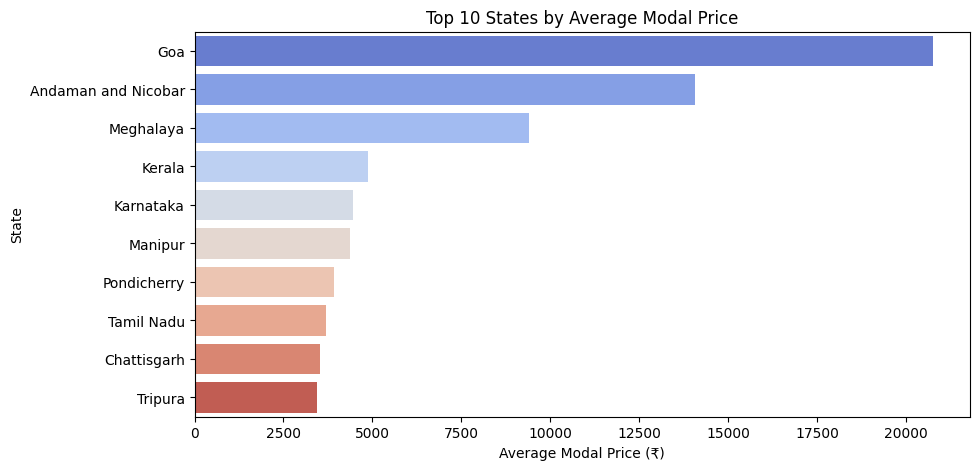

<ipython-input-8-149d2e2118fd>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="commodity", y="avg_modal_price", data=top_commodities, palette="magma")


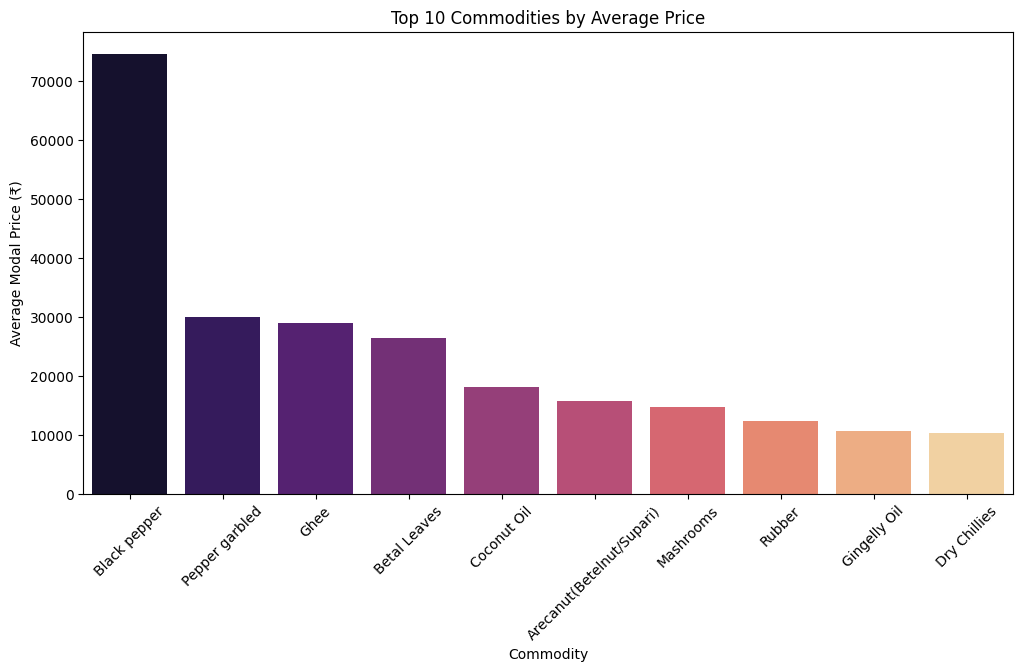

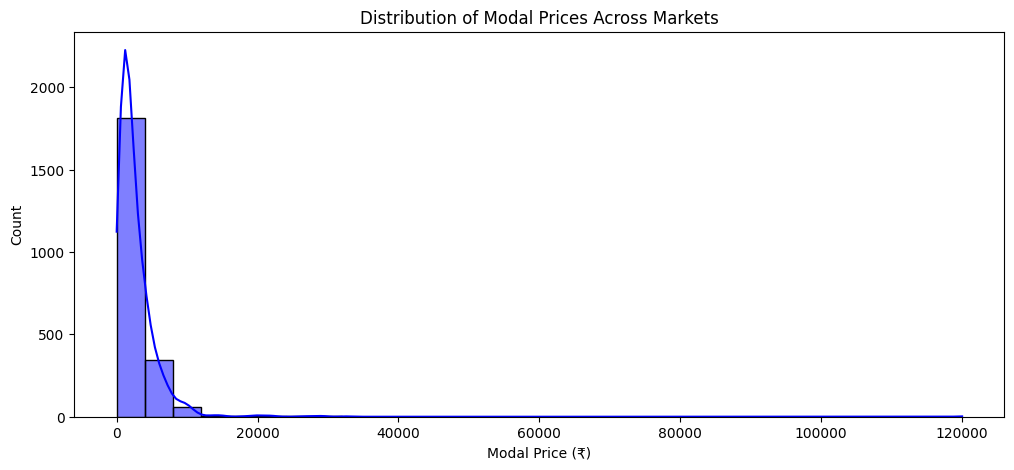

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "data.csv"

# Step 3: Load the Dataset
df = pd.read_csv(file_name)

# Step 4: Display the First Few Rows
print("📌 Dataset Overview:")
print(df.head())

# Step 5: Check for Missing Values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Step 6: Convert Date Column (If Needed)
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# Step 7: Geographic Segmentation (Average Modal Price by State & District)
geo_segmentation = df.groupby(["state", "district"])["modal_price"].mean().reset_index()

# Identify Highest & Lowest Priced States
highest_priced_state = geo_segmentation.loc[geo_segmentation["modal_price"].idxmax()]
lowest_priced_state = geo_segmentation.loc[geo_segmentation["modal_price"].idxmin()]

print(f"\n📊 Geographic Segmentation Insights:")
print(f"✅ Highest Average Modal Price: {highest_priced_state['state']} ({highest_priced_state['district']}) - ₹{highest_priced_state['modal_price']:.2f}")
print(f"✅ Lowest Average Modal Price: {lowest_priced_state['state']} ({lowest_priced_state['district']}) - ₹{lowest_priced_state['modal_price']:.2f}")

# Step 8: Pricing Analysis (Min, Max, and Average Modal Price by Commodity)
pricing_analysis = df.groupby("commodity").agg(
    min_price=("min_price", "min"),
    max_price=("max_price", "max"),
    avg_modal_price=("modal_price", "mean")
).reset_index()

# Identify Highest & Lowest Priced Commodities
highest_priced_commodity = pricing_analysis.loc[pricing_analysis["avg_modal_price"].idxmax()]
lowest_priced_commodity = pricing_analysis.loc[pricing_analysis["avg_modal_price"].idxmin()]

print("\n💰 Pricing Analysis Insights:")
print(f"✅ Highest-Priced Commodity: {highest_priced_commodity['commodity']} - ₹{highest_priced_commodity['avg_modal_price']:.2f}")
print(f"✅ Lowest-Priced Commodity: {lowest_priced_commodity['commodity']} - ₹{lowest_priced_commodity['avg_modal_price']:.2f}")

# Step 9: Market Clustering (Grouping Markets Based on Pricing Trends)
market_clustering = df.groupby(["state", "market"]).agg(
    avg_min_price=("min_price", "mean"),
    avg_max_price=("max_price", "mean"),
    avg_modal_price=("modal_price", "mean")
).reset_index()

# Identify Most & Least Expensive Markets
highest_priced_market = market_clustering.loc[market_clustering["avg_modal_price"].idxmax()]
lowest_priced_market = market_clustering.loc[market_clustering["avg_modal_price"].idxmin()]

print("\n📍 Market Pricing Trends:")
print(f"✅ Expensive Market: {highest_priced_market['market']} ({highest_priced_market['state']}) - ₹{highest_priced_market['avg_modal_price']:.2f}")
print(f"✅ Affordable Market: {lowest_priced_market['market']} ({lowest_priced_market['state']}) - ₹{lowest_priced_market['avg_modal_price']:.2f}")

# Step 10: Save Processed Data to CSV Files
geo_segmentation.to_csv("geo_segmentation.csv", index=False)
pricing_analysis.to_csv("pricing_analysis.csv", index=False)
market_clustering.to_csv("market_clustering.csv", index=False)

print("\n✅ Data Analysis Completed! Results saved as CSV files.")

# Step 11: Visualization 1 - Top 10 States by Average Modal Price
top_states = geo_segmentation.groupby("state")["modal_price"].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="modal_price", y="state", data=top_states, palette="coolwarm")
plt.xlabel("Average Modal Price (₹)")
plt.ylabel("State")
plt.title("Top 10 States by Average Modal Price")
plt.show()

# Step 12: Visualization 2 - Price Range of Top 10 Commodities
top_commodities = pricing_analysis.nlargest(10, "avg_modal_price")

plt.figure(figsize=(12,6))
sns.barplot(x="commodity", y="avg_modal_price", data=top_commodities, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Commodity")
plt.ylabel("Average Modal Price (₹)")
plt.title("Top 10 Commodities by Average Price")
plt.show()

# Step 13: Visualization 3 - Market Price Distribution
plt.figure(figsize=(12,5))
sns.histplot(df["modal_price"], bins=30, kde=True, color="blue")
plt.xlabel("Modal Price (₹)")
plt.title("Distribution of Modal Prices Across Markets")
plt.show()
